**Ejercicio 1**

Dado un valor $n$, realice las siguientes tareas:

1. **Calcular el factorial**: Obtenga el resultado de multiplicar los números del 1 al $n$ (factorial de $n$). Implemente una función que realice este cálculo.

2. **Matriz comparativa de vectores aleatorios**: 
   - Cree dos vectores $V_1$ y $V_2$ de tamaño $n$ con números aleatorios entre 1 y 10
   - Genere un vector $V_3$ donde:
     - $V_3[i] = 0$ si $V_1[i] < V_2[i]$
     - $V_3[i] = 1$ en caso contrario
   - Concatene los tres vectores ($V_1$, $V_2$, $V_3$) como columnas para obtener una matriz de dimensiones $(n \times 3)$

**Sugerencias:**
- Utilice `NumPy` para generar los vectores aleatorios
- Use `np.random.randint()` para los números aleatorios
- Use `np.concatenate()` para combinar los vectores en una matriz
- Pruebe con $n = 10$ como ejemplo


In [2]:
#Se definirán las siguientes 2 funciones para calcular el factorial y matriz comparativa de vectores aleatorios
import numpy as np
import random as rand

np.random.seed(45)
rand.seed(45)

def factorial(n):
    res=1
    for i in range(1,n+1):
        res*=i
    return res
def matriz_compa(n):
    vec1=np.random.randint(1,10,n)
    vec2=np.random.randint(1,10,n)
    vec3=np.ones(n)
    for i in range(n):
        if vec1[i]<vec2[i]:
            vec3[i]=0
    
    return np.concatenate(
        (vec1.reshape(-1,1),
         vec2.reshape(-1,1),
         vec3.reshape(-1,1)),
        axis=1)
#Prueba 
#Se hará el ejemplo con n=10
n=10
print(f"El factorial de {n} es {factorial(n)}")
print("El resultado para la matriz comparativa de vectores aleatorios es el siguiente")
print(matriz_compa(n))
    

El factorial de 10 es 3628800
El resultado para la matriz comparativa de vectores aleatorios es el siguiente
[[4. 8. 0.]
 [1. 9. 0.]
 [6. 6. 1.]
 [4. 3. 1.]
 [5. 9. 0.]
 [9. 2. 1.]
 [2. 7. 0.]
 [6. 5. 1.]
 [7. 9. 0.]
 [9. 5. 1.]]


**Ejercicio 2**

Dado valores $m$ (número de filas) y $n$ (número de columnas), realice las siguientes tareas:

1. **Crear matriz de ceros**: Genere una matriz $A$ de dimensiones $(m \times n)$ inicializada con ceros.

2. **Llenar matriz con números aleatorios (usando `while`)**: 
   - Utilizando un bucle `while`, reemplace cada columna de la matriz $A$ por vectores de números aleatorios enteros en el rango $[-1, 3]$
   - Recorra columna por columna

3. **Transformar elementos (usando `while`)**: 
   - Utilizando dos bucles `while` anidados, recorra todos los elementos de la matriz
   - Reemplace los elementos **negativos** por $-1$
   - Reemplace los elementos **no negativos** (cero o positivos) por $5$

4. **Repetir transformación (usando `for`)**: 
   - Realice el mismo ejercicio del paso 3, pero esta vez utilizando dos bucles `for` anidados
   - Compare los resultados para verificar que ambos métodos producen la misma matriz

**Sugerencias:**
- Use `np.zeros()` para crear la matriz inicial
- Use `np.random.randint()` para generar números aleatorios
- Recuerde que `while` requiere control manual del índice (incremento)
- Compare las dos matrices finales con `np.array_equal()`
- Pruebe con $m = 4$ y $n = 3$ como ejemplo


In [3]:
import numpy as np
import random as rand
np.random.seed(45)
rand.seed(45)
#Inciso 1
m=4;n=3
A=np.zeros((m,n))
#Inciso 2
i=0
while i<n:
   vec=np.random.randint(-1,3,m)
   A[:,i]=vec
   i+=1 
print(A)
#Inciso 3
def transformar_matriz_while(A,m,n):
    A_res=np.zeros((m,n))
    i=0
    while i<m:
        j=0
        while j<n:
            if A[i][j]<0:
                A_res[i][j]=-1
            else:
                A_res[i][j]=5
            j+=1
        i+=1
    return A_res
A_while=transformar_matriz_while(A,m,n)
#Inciso 4
def transformar_matriz_for(A,m,n):
    A_res=np.zeros((m,n))
    for i in range(m):
        for j in range(n):
            if A[i][j]<0:
                A_res[i][j]=-1
            else:
                A_res[i][j]=5
    return A_res
A_for=transformar_matriz_for(A,m,n)
if np.array_equal(A_while,A_for)==True:
    print("La matriz transformada con el ciclo while es igual a la transformada con el ciclo for")
else:
    print("La matriz transformada con el ciclo while es no igual a la transformada con el ciclo for")



[[ 2. -1.  2.]
 [ 1.  2. -1.]
 [ 2.  0.  0.]
 [-1.  0. -1.]]
La matriz transformada con el ciclo while es igual a la transformada con el ciclo for


**Ejercicio 3**

Se recolectaron datos de 8 estudiantes universitarios y se resumieron en la siguiente tabla:

<div align="center">

|MASA| ESTATURA| GENERO| ESTRATO |FUMA|
|----|---------|--------|--------|----|
|71 |183| HOMBRE |2| NO|
|45| 168 |HOMBRE| 1 |NO|
|50| 164 |HOMBRE| 1 |NO|
|60| 164 |MUJER |3 |SI|
|61| 167 |HOMBRE| 3| SI|
|84| 182 |HOMBRE| 3| NO|
|55| 168 |MUJER |3 |NO|
|60| 170 |HOMBRE| 3 |SI|

</div>

1. Crear un data frame y llamarlo __df__.
2. Realizar un análisis descriptivo básico de todas las variables.
3. Extraer un subconjunto de datos con los primeros 4 estudiantes y llamarlo __subc1__.
4. Extraer las variables categóricas y guardarlas en un subconjunto llamado __subc2__
5. Extraer las variables numéricas y guardarlas en un subconjunto llamado __subc3__

In [4]:
#Inciso 1
import pandas as pd

data={
    "MASA":[71,45,50,60,61,84,55,60],
    "ESTATURA":[183,168,164,164,167,182,168,170],
    "GENERO":["HOMBRE","HOMBRE","HOMBRE","MUJER","HOMBRE","HOMBRE","MUJER","HOMBRE"],
    "ESTRATO":[2,1,1,3,3,3,3,3],
    "FUMA":["NO","NO","NO","SI","SI","NO","NO","SI"]
}
df=pd.DataFrame(data)
df


,MASA,ESTATURA,GENERO,ESTRATO,FUMA
0,71,183,HOMBRE,2,NO
1,45,168,HOMBRE,1,NO
2,50,164,HOMBRE,1,NO
3,60,164,MUJER,3,SI
4,61,167,HOMBRE,3,SI
5,84,182,HOMBRE,3,NO
6,55,168,MUJER,3,NO
7,60,170,HOMBRE,3,SI


In [ ]:
#Inciso 2
#Variables numéricas: MASA, ESTATURA
resumen=df[["MASA", "ESTATURA"]].describe()
resumen
resumen=resumen.rename(index={
    "count": "Conteo",
    "mean": "Media",
    "std": "Desv. Std",
    "min": "Mínimo",
    "25%": "Q1 (25%)",
    "50%": "Mediana",
    "75%": "Q3 (75%)",
    "max": "Máximo"
})
resumen

,MASA,ESTATURA,ESTRATO
Conteo,8.000000,8.00000,8.000000
Media,60.750000,170.75000,2.375000
Desv. Std,12.209481,7.53563,0.916125
Mínimo,45.000000,164.00000,1.000000
Q1 (25%),53.750000,166.25000,1.750000
Mediana,60.000000,168.00000,3.000000
Q3 (75%),63.500000,173.00000,3.000000
Máximo,84.000000,183.00000,3.000000


**Variable Masa**

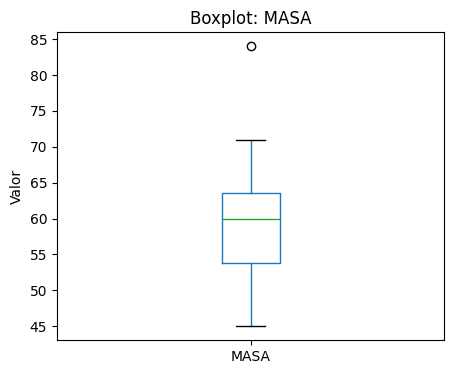

In [20]:
import matplotlib.pyplot as plt

df[["MASA"]].boxplot(figsize=(5,4), grid=False)
plt.title("Boxplot: MASA")
plt.ylabel("Valor")

plt.show()

La variable masa fue analizada a partir de 8 observaciones. Se obtuvo un promedio de masa de aproximadamente 60.75 con una desviación estándar de 12.20, donde el 50% de las observaciones se encuentra por debajo de los 60kg. El peso minimo registrado fue de 45kg y el máximo de 84 kg. 


**Variable Estatura**

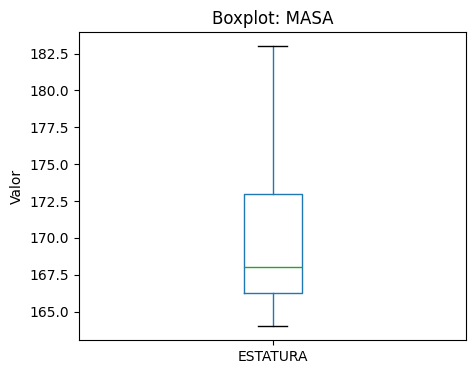

In [ ]:
import matplotlib.pyplot as plt

df[["ESTATURA"]].boxplot(figsize=(5,4), grid=False)
plt.title("Boxplot: Estatura")
plt.ylabel("Valor")

plt.show()

La variable estatura fue analizada a partir de 8 observaciones. Se obtuvo un promedio de masa de aproximadamente 170 cm con una desviación estándar de 7.53 cm, donde el 50% de las observaciones se encuentra por debajo de los 168 cm. La altura minimo registrada fue de 164cm y la máxima de 183 cm. 


**Variables Género, Fuma y Estrato**

In [35]:
# --- Tabla para GENERO ---
tabla_genero = (
    df['GENERO'].value_counts(sort=False)         
      .rename_axis("Categoria")         
      .reset_index(name="Frecuencia")
)
total_g = tabla_genero["Frecuencia"].sum()
tabla_genero["Porcentaje"] = (tabla_genero["Frecuencia"] / total_g * 100).round(2)
tabla_genero.insert(0, "Variable", "GENERO")
tabla_genero = tabla_genero[["Variable", "Categoria", "Frecuencia", "Porcentaje"]]

# --- Tabla para FUMA ---
tabla_fuma = (
    df['FUMA'].value_counts(sort=False)
      .rename_axis("Categoria")
      .reset_index(name="Frecuencia")
)
total_f = tabla_fuma["Frecuencia"].sum()
tabla_fuma["Porcentaje"] = (tabla_fuma["Frecuencia"] / total_f * 100).round(2)
tabla_fuma.insert(0, "Variable", "FUMA")
tabla_fuma = tabla_fuma[["Variable", "Categoria", "Frecuencia", "Porcentaje"]]

# --- Tabla para ESTRATO ---
tabla_estrato = (
    df['ESTRATO'].value_counts(sort=False)
      .rename_axis("Categoria")
      .reset_index(name="Frecuencia")
)
total_e = tabla_estrato["Frecuencia"].sum()
tabla_estrato["Porcentaje"] = (tabla_estrato["Frecuencia"] / total_e * 100).round(2)
tabla_estrato.insert(0, "Variable", "ESTRATO")
tabla_estrato = tabla_estrato[["Variable", "Categoria", "Frecuencia", "Porcentaje"]]

tabla = pd.concat([tabla_genero, tabla_fuma, tabla_estrato], ignore_index=True)

# mostrar tabla
print(tabla)

  Variable Categoria  Frecuencia  Porcentaje
0   GENERO    HOMBRE           6        75.0
1   GENERO     MUJER           2        25.0
2     FUMA        NO           5        62.5
3     FUMA        SI           3        37.5
4  ESTRATO         2           1        12.5
5  ESTRATO         1           2        25.0
6  ESTRATO         3           5        62.5


En cuanto al género, podemos ver que el 75% de los encuestados fueron hombres, mientras que el 25% fueron mujeres. Por otro lado, el 62.5% de los encuestados no fuma, en cambio el 37.5% si fuma. Finalmente, si analizamos el estrato encontramos que la mayoría de encuestados corresponden al estrato 3, correspondiente al 62.5%. En el estrato 1, se encuentran el 25% de los estudiantes, mientras que en el estrato 1, se encuentra el 12.5%.

In [7]:
#Inciso 3
subc1=df.head(n=4)
subc1

,MASA,ESTATURA,GENERO,ESTRATO,FUMA
0,71,183,HOMBRE,2,NO
1,45,168,HOMBRE,1,NO
2,50,164,HOMBRE,1,NO
3,60,164,MUJER,3,SI


In [8]:
#Inciso 4
subc2=df[["GENERO","FUMA"]]
subc2

,GENERO,FUMA
0,HOMBRE,NO
1,HOMBRE,NO
2,HOMBRE,NO
3,MUJER,SI
4,HOMBRE,SI
5,HOMBRE,NO
6,MUJER,NO
7,HOMBRE,SI


In [9]:
#Inciso 5
subc3=df[["MASA", "ESTATURA", "ESTRATO"]]
subc3

,MASA,ESTATURA,ESTRATO
0,71,183,2
1,45,168,1
2,50,164,1
3,60,164,3
4,61,167,3
5,84,182,3
6,55,168,3
7,60,170,3
